In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/df_indi_works.csv', index_col = [0])
#data = data[data["count_works"].isin({0, 1, 2})]  # Not more ?
data['count_works'][data['count_works']==0] = 1


regions = pd.read_csv(
    "../data/ENS - Cultural Index - Countries Databases - region_level.csv"
)

regions = regions[regions['region_name']!='Eastern Europe']

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_99096/1421771303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_works'][data['count_works']==0] = 1


,region_name,level
0,Northwestern Europe,3
1,Western Europe,3
2,France,2
3,Spain,2
4,Low countries,2
5,Belgium,1
6,German world,2
7,Germany,1
8,British Islands,3
9,United Kingdom,2


In [14]:

regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"

regions = regions[regions["level"] == 2]
regions = set(regions["region_name"])
df = data[data["region_name"].isin(regions)]
#df = df[df['decade']<=1870]

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_96580/3740081529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_works'][data['count_works']==0] = 1
/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_96580/3740081529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"


In [1]:
df = pd.read_csv("data/df_indi_works_occupations.csv", index_col=0)
print(df.occupation.value_counts())

regions = pd.read_csv(
    "data/ENS - Cultural Index - Countries Databases - region_level.csv"
)


NameError: name 'pd' is not defined

In [11]:
df[df['region_name']=='Korea']

,individual_wikidata_id,decade,individual_name,score,region_name,count_works
0,Q496891,1570,Seong Hon,13,Korea,1.0
2944,Q484883,1640,Heo Jeok,2,Korea,1.0
5781,Q497114,1650,Kim Ikhun,2,Korea,1.0
6814,Q12584053,1570,Go Gyeong-myeong,8,Korea,1.0
18970,Q488377,650,Jindeok of Silla,1,Korea,1.0
...,...,...,...,...,...,...
504135,Q469396,1380,Jeong Do-jeon,16,Korea,2.0
506180,Q626748,1440,Jeong Chang-son,1,Korea,1.0
508467,Q16178036,1860,Kang Wi,12,Korea,1.0
508876,Q6408679,730,Kim Gyo-gak,1,Korea,1.0


In [7]:
df['count_works'].value_counts()

count_works
1.0       131721
2.0         5457
3.0         3142
4.0         2178
5.0         1566
           ...  
791.0          1
416.0          1
1370.0         1
1073.0         1
599.0          1
Name: count, Length: 476, dtype: int64

In [8]:
df_f0 = df[df['count_works']==1]
total_f0 = df_f0.groupby('region_name')['count_works'].sum()
total_counts = df.groupby('region_name')['count_works'].sum()

final = total_f0 / total_counts
final = final.reset_index()
final = final.rename(columns={'count_works': 'coverage'})
final = final.sort_values(by='coverage', ascending=True)

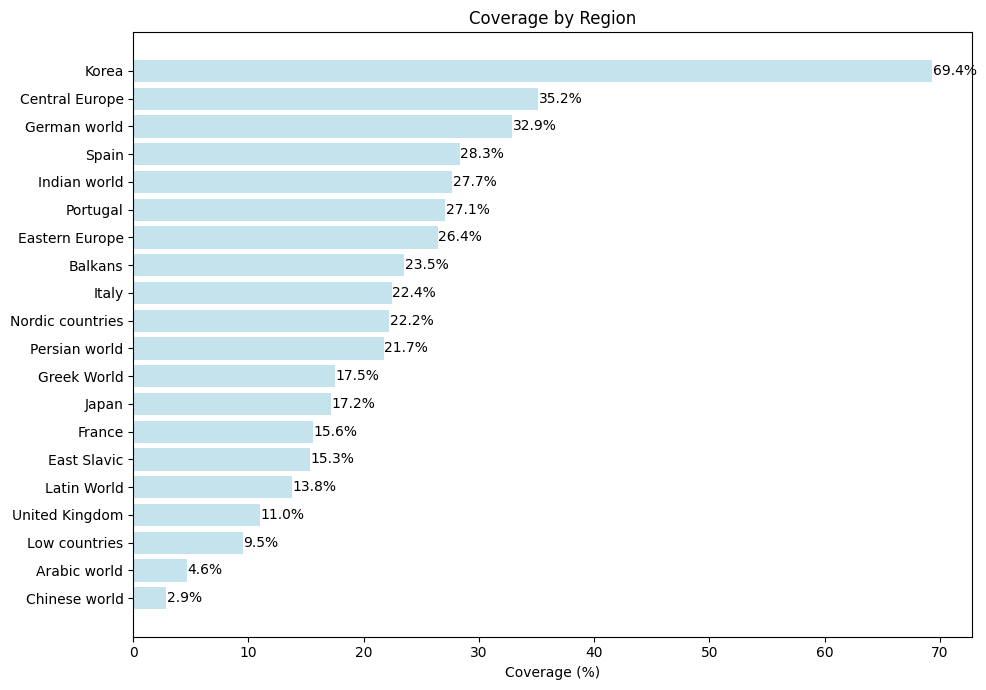

In [9]:

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(final['region_name'], final['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()